<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">age group analize </h3>
</div>

## Importing the libraries

In [2]:
#Let's Import the Packages...
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">load Data </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## Load 

In [3]:
#Let's Read csv file
data_Total = pd.read_csv("C:/Users/Salio/Desktop/NEW_article/Data - groupnewage.csv")
#Show some records of dataframe
data_Total.sample(10)

,ID_Patient,Sex,Age,Age_Groups_5y,Age_Group,Glabellar,Piriform_Height,Maxillary,Piriform_Width,Male_Group,Femle_Group
79,kazemi,2,57,8,3,71.2,31.66,77.69,25.60,,3
1,Karami,1,21,1,1,62.6,34.45,88.69,24.55,1,
78,ebrahimi,2,57,8,3,70.9,31.64,77.70,25.42,,3
16,habibi,1,29,2,2,62.1,34.59,88.41,24.85,2,
43,Rezaei,1,62,9,3,57.1,35.60,86.84,25.80,3,
58,barzegar,2,25,2,2,73.3,31.04,81.69,23.32,,2
60,kazemi,2,26,2,2,73.2,31.06,81.44,23.45,,2
44,vahedi,1,62,9,3,57.0,35.69,86.82,25.90,3,
49,shahsavari,1,78,12,4,56.1,35.91,86.60,26.40,4,
53,laftavi,2,23,1,1,73.4,30.88,81.83,23.12,,1


<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Prepare Data and EDA </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## EDA and Prepare Data

In [4]:
data_Total.index

RangeIndex(start=0, stop=100, step=1)

In [5]:
# get information about data!!
data_Total.info()
# In this data some features are in the form object (Geography -Gender -Surname)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Patient       100 non-null    object 
 1   Sex              100 non-null    int64  
 2   Age              100 non-null    int64  
 3   Age_Groups_5y    100 non-null    int64  
 4   Age_Group        100 non-null    int64  
 5   Glabellar        100 non-null    float64
 6   Piriform_Height  100 non-null    float64
 7   Maxillary        100 non-null    float64
 8   Piriform_Width   100 non-null    float64
 9   Male_Group       100 non-null    object 
 10  Femle_Group      100 non-null    object 
dtypes: float64(4), int64(4), object(3)
memory usage: 8.7+ KB


In [6]:
# Check columns list and missing values
data_Total.isnull().sum()

ID_Patient         0
Sex                0
Age                0
Age_Groups_5y      0
Age_Group          0
Glabellar          0
Piriform_Height    0
Maxillary          0
Piriform_Width     0
Male_Group         0
Femle_Group        0
dtype: int64

In [7]:
# Get unique count for each variable
data_Total.nunique()

ID_Patient         96
Sex                 2
Age                49
Age_Groups_5y      12
Age_Group           4
Glabellar          57
Piriform_Height    82
Maxillary          91
Piriform_Width     70
Male_Group          5
Femle_Group         5
dtype: int64

In [8]:
# Drop the columns as explained above---->("RowNumber", "CustomerId", "Surname")

data_sel = data_Total.drop(["ID_Patient", "Male_Group", "Femle_Group","Age_Group"], axis = 1)
data_sel

,Sex,Age,Age_Groups_5y,Glabellar,Piriform_Height,Maxillary,Piriform_Width
0,1,20,1,62.70,34.41,88.70,24.50
1,1,21,1,62.60,34.45,88.69,24.55
2,1,21,1,62.50,34.46,88.68,24.50
3,1,21,1,62.55,34.47,88.66,24.53
4,1,21,1,62.45,34.46,88.67,24.50
...,...,...,...,...,...,...,...
95,2,68,10,70.50,31.78,77.34,25.89
96,2,69,10,70.70,31.78,77.25,26.00
97,2,69,10,70.40,31.79,77.20,26.12
98,2,71,11,70.00,31.80,77.10,26.21


In [9]:
corr =data_sel.corr()
corr.shape

(7, 7)

<AxesSubplot:>

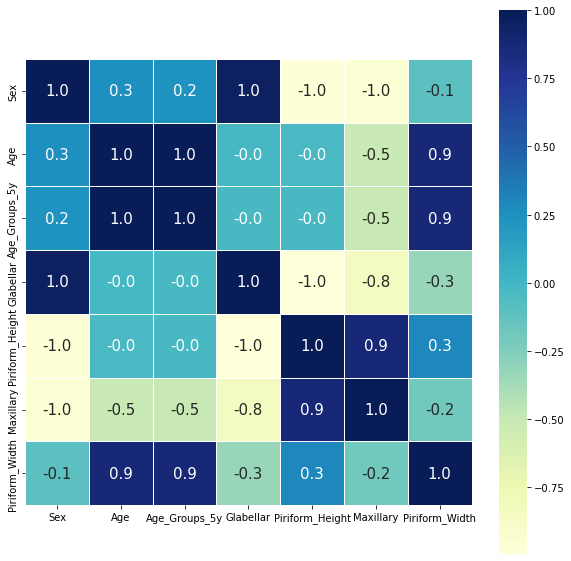

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5)

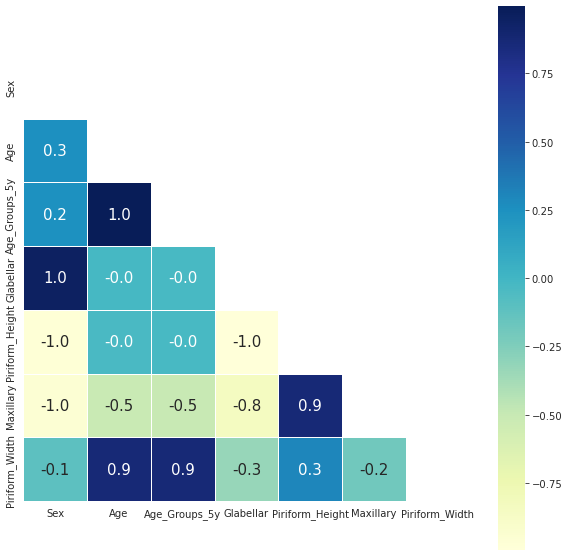

In [11]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='YlGnBu',linewidths=.5,mask = mask)

In [12]:
data_sel = data_Total.drop(["ID_Patient", "Male_Group", "Femle_Group","Age","Age_Group"], axis = 1)
data_sel

,Sex,Age_Groups_5y,Glabellar,Piriform_Height,Maxillary,Piriform_Width
0,1,1,62.70,34.41,88.70,24.50
1,1,1,62.60,34.45,88.69,24.55
2,1,1,62.50,34.46,88.68,24.50
3,1,1,62.55,34.47,88.66,24.53
4,1,1,62.45,34.46,88.67,24.50
...,...,...,...,...,...,...
95,2,10,70.50,31.78,77.34,25.89
96,2,10,70.70,31.78,77.25,26.00
97,2,10,70.40,31.79,77.20,26.12
98,2,11,70.00,31.80,77.10,26.21


In [13]:
corr =data_sel.corr()
corr.shape

(6, 6)

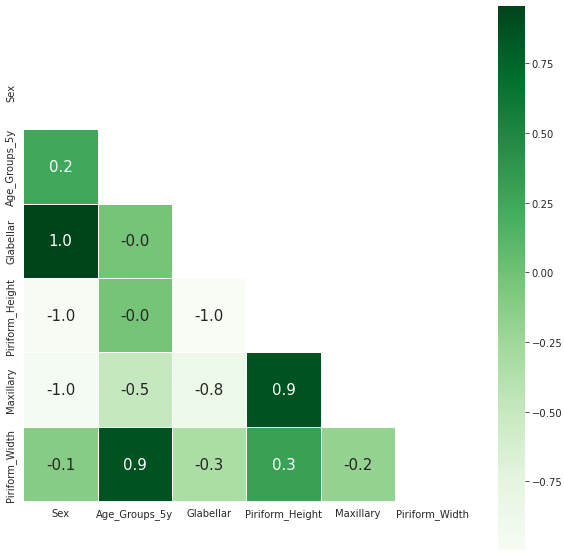

In [14]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens',linewidths=.5,mask = mask)

In [15]:
print('seaborn: %s' % sns.__version__)

seaborn: 0.11.2


In [16]:
print(sklearn.__version__)

1.0.1


In [17]:
plt.rcParams['figure.figsize'] = (18, 8)

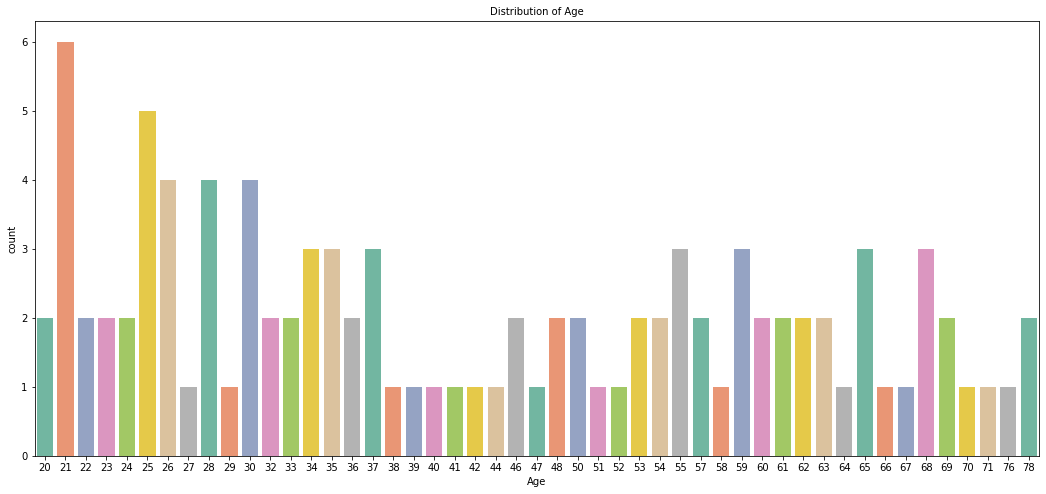

In [18]:
sns.countplot(data_Total['Age'], palette = "Set2")
plt.title('Distribution of Age', fontsize =10)
plt.show()

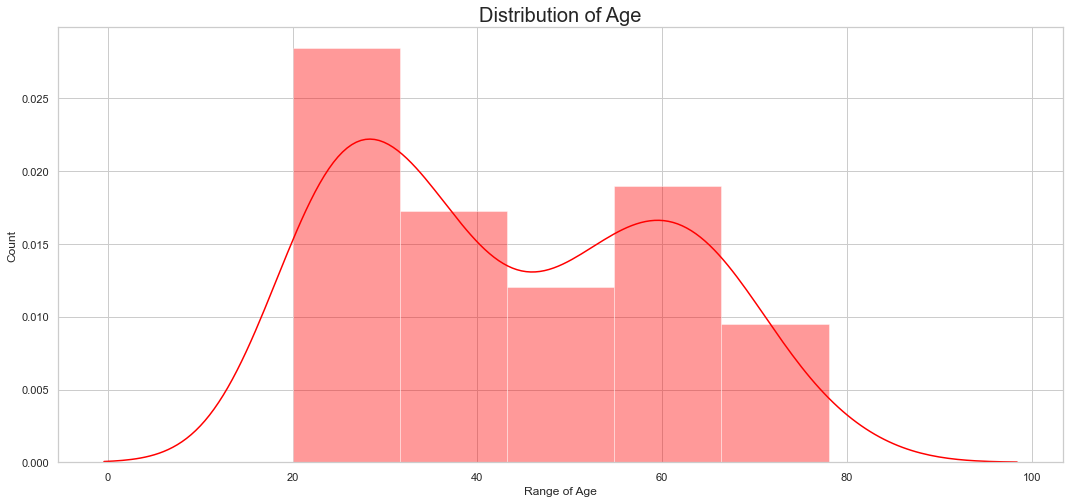

In [19]:
sns.set(style = 'whitegrid')
sns.distplot(data_Total['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

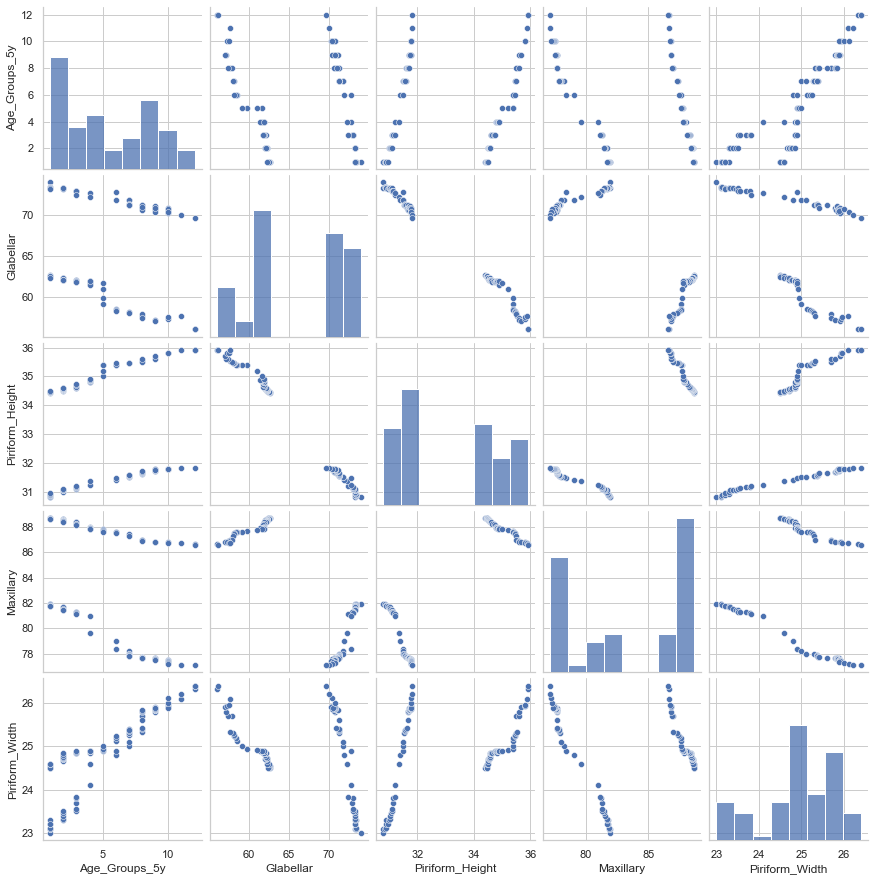

In [20]:
data_sel1 = data_sel.drop(["Sex"], axis = 1)
sns.pairplot(data_sel1)
# plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

In [21]:
# sns.catplot(x='Piriform_Width', y="Sex",hue ='Sex',kind="violin", data=data_sel)

<AxesSubplot:xlabel='Piriform_Width', ylabel='Age'>

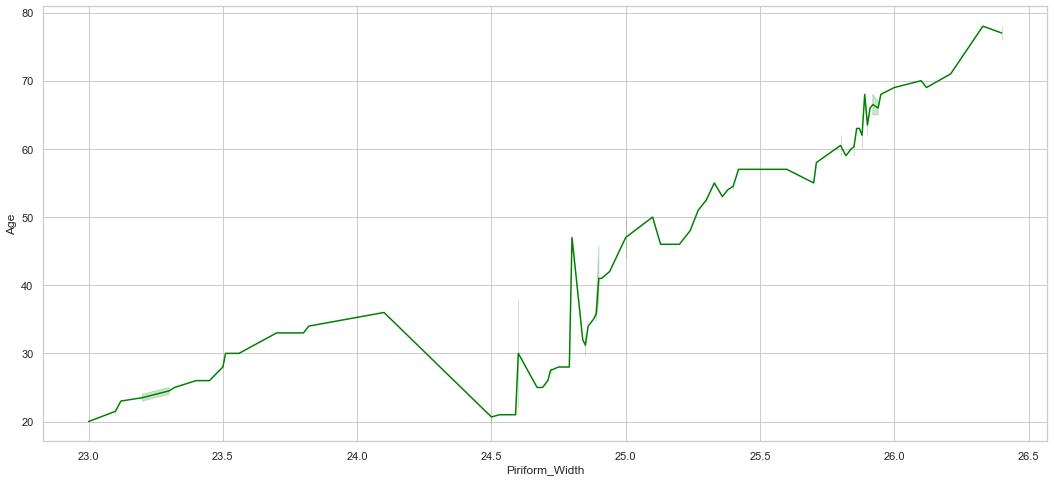

In [22]:
sns.lineplot(x = data_sel['Piriform_Width'],y = data_Total['Age'],color = 'green')

In [23]:
data_Total

,ID_Patient,Sex,Age,Age_Groups_5y,Age_Group,Glabellar,Piriform_Height,Maxillary,Piriform_Width,Male_Group,Femle_Group
0,khatoni,1,20,1,1,62.70,34.41,88.70,24.50,1,
1,Karami,1,21,1,1,62.60,34.45,88.69,24.55,1,
2,abasspor,1,21,1,1,62.50,34.46,88.68,24.50,1,
3,teymoriyan,1,21,1,1,62.55,34.47,88.66,24.53,1,
4,hadad,1,21,1,1,62.45,34.46,88.67,24.50,1,
...,...,...,...,...,...,...,...,...,...,...,...
95,sadavi,2,68,10,4,70.50,31.78,77.34,25.89,,4
96,seirafi,2,69,10,4,70.70,31.78,77.25,26.00,,4
97,ramazan,2,69,10,4,70.40,31.79,77.20,26.12,,4
98,beyranvand,2,71,11,4,70.00,31.80,77.10,26.21,,4


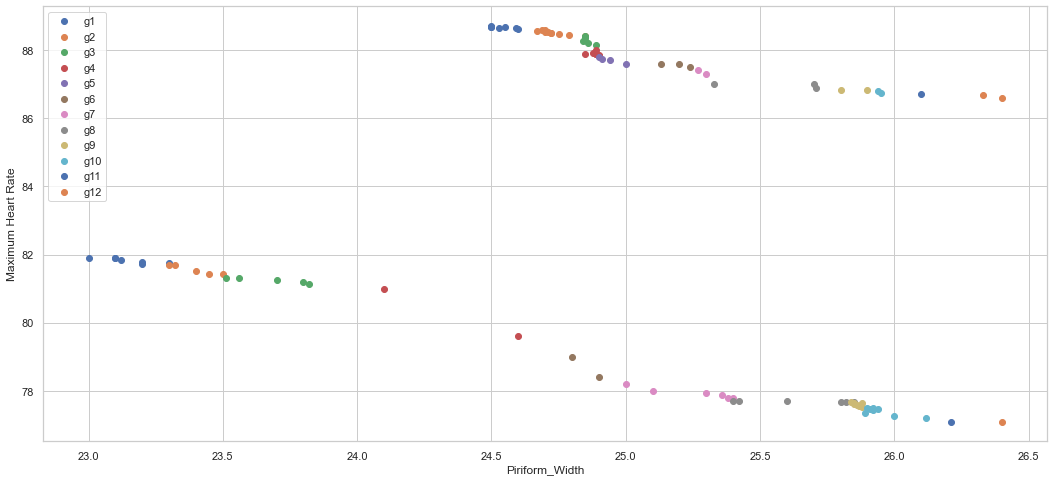

In [24]:
# data_Total &  data_sel
#  Age =Piriform_Width & talach  =  Maxillary  & target =Age_Groups_5y & df  = Data_Total
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==1], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==1)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==2], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==2)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==3], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==3)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==4], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==4)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==5], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==5)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==6], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==6)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==7], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==7)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==8], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==8)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==9], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==9)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==10], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==10)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==11], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==11)])
plt.scatter(x=data_Total.Piriform_Width[data_Total.Age_Groups_5y==12], y=data_Total.Maxillary[(data_Total.Age_Groups_5y==12)])
plt.legend(["g1", "g2","g3","g4","g5","g6","g7","g8","g9","g10","g11","g12"])

plt.xlabel("Piriform_Width")
plt.ylabel("Maximum Heart Rate")
plt.show()

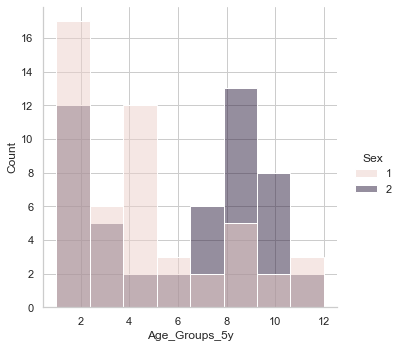

In [25]:
# number of total Servived sex
sns.displot(data=data_sel, x="Age_Groups_5y",hue='Sex') 

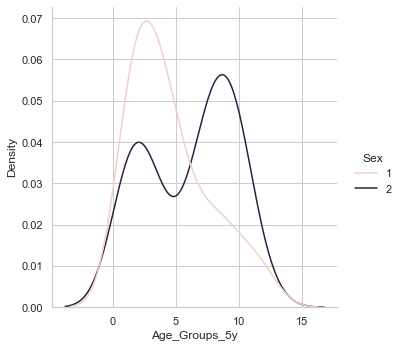

In [27]:
sns.displot(data=data_sel, x="Age_Groups_5y",hue='Sex',kind ='kde') 

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Train  Model </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">
</div>

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Logistic Regression </span></strong>

In [28]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn import metrics # for checking the model accuracy


In [29]:
data_sel

,Sex,Age_Groups_5y,Glabellar,Piriform_Height,Maxillary,Piriform_Width
0,1,1,62.70,34.41,88.70,24.50
1,1,1,62.60,34.45,88.69,24.55
2,1,1,62.50,34.46,88.68,24.50
3,1,1,62.55,34.47,88.66,24.53
4,1,1,62.45,34.46,88.67,24.50
...,...,...,...,...,...,...
95,2,10,70.50,31.78,77.34,25.89
96,2,10,70.70,31.78,77.25,26.00
97,2,10,70.40,31.79,77.20,26.12
98,2,11,70.00,31.80,77.10,26.21


In [30]:
X = data_sel.drop(['Age_Groups_5y'],axis = 1)
y = data_sel['Age_Groups_5y']
y

0      1
1      1
2      1
3      1
4      1
      ..
95    10
96    10
97    10
98    11
99    12
Name: Age_Groups_5y, Length: 100, dtype: int64

In [31]:
print(X.shape)
print(y.shape)

(100, 5)
(100,)


In [32]:
# !pip install mlxtend

In [33]:
# from mlxtend.data         import  iris_data
# from mlxtend.classifier   import  Perceptron
# from mlxtend.plotting     import  plot_decision_regions

In [34]:
# import  plot_decision_regions
# plot_decision_regions(X, y, clf=ppn);

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)

In [38]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.36


In [39]:
from sklearn.metrics import recall_score
print('The Recall of Logistic Regression is: ', (metrics.recall_score(y_test, y_pred,average='micro')))

The Recall of Logistic Regression is:  0.36


In [40]:
# Precision
from sklearn.metrics import precision_score
print('The Precision of Logistic Regression is: ', (metrics.precision_score(y_test, y_pred,average='micro')))

The Precision of Logistic Regression is:  0.36


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.75      1.00      0.86         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         3
           9       0.17      0.50      0.25         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1

    accuracy                           0.36        25
   macro avg       0.22      0.32      0.25        25
weighted avg       0.22      0.36      0.27        25



In [43]:
confusion_matrix = pd.crosstab(logreg.predict(X),y)

In [44]:
confusion_matrix

Age_Groups_5y,1,2,3,4,5,6,7,8,9,10,11,12
row_0,,,,,,,,,,,,
1,14,15,3,0,0,0,0,0,0,0,0,0
2,0,0,3,0,0,0,0,0,0,0,0,0
3,0,0,2,2,0,0,0,0,0,0,0,0
4,0,0,3,8,3,1,0,0,0,0,0,0
5,0,0,0,0,1,3,2,3,2,1,0,0
7,0,0,0,0,0,1,6,2,0,0,0,0
9,0,0,0,0,0,0,0,4,7,8,0,0
10,0,0,0,0,0,0,0,0,0,1,2,3


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [46]:
cm_lr=confusion_matrix(y_test, y_pred)

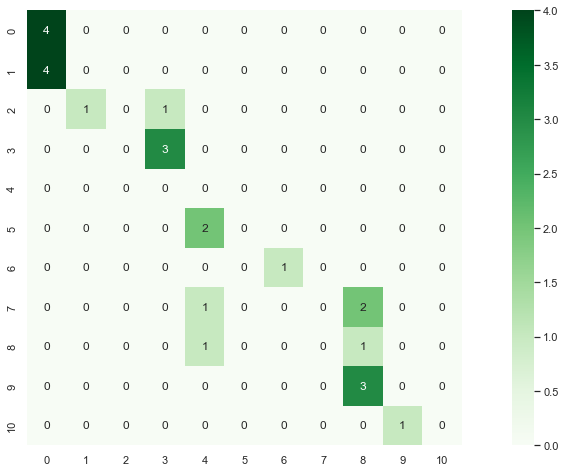

In [48]:
sns.heatmap(cm_lr,square=True , annot=True, cmap="Greens")
plt.show()

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> KNN Regressor</span></strong>

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [51]:
knn = KNeighborsClassifier()

In [52]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = knn.predict(X_test)

In [54]:
knn.score(X_train, y_train)

0.7733333333333333

In [55]:
knn.score(X_test, y_test)

0.72

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         2
           7       0.25      1.00      0.40         1
           8       0.00      0.00      0.00         3
           9       0.33      0.50      0.40         2
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         1

    accuracy                           0.72        25
   macro avg       0.56      0.65      0.58        25
weighted avg       0.68      0.72      0.69        25



<AxesSubplot:>

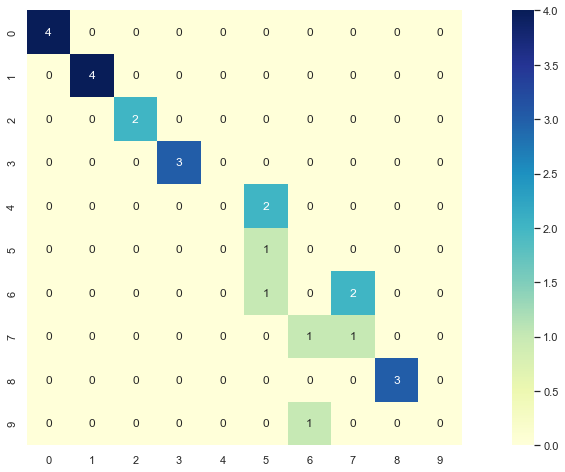

In [58]:
cm_knn =confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, square=True , annot=True,cmap ="YlGnBu")

## Optimal value of K

In [59]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

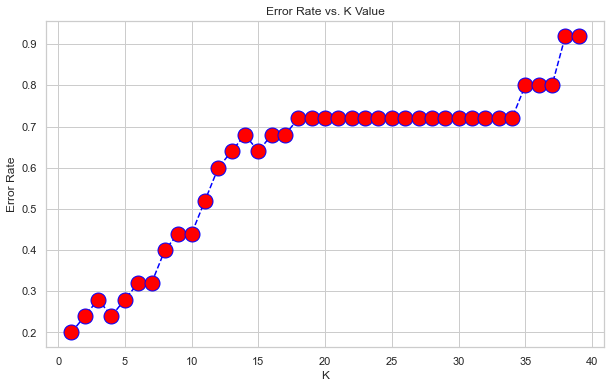

In [60]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
# min Error Rate  = 3
knn_Node2 = KNeighborsClassifier(n_neighbors=2)

In [63]:
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

In [65]:
# #  Find  Elbow Curve
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [66]:
knn_Node2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [67]:
y_pred_knn_Node2 = knn_Node2.predict(X_test)

In [68]:
knn_Node2.score(X_train, y_train)

0.8666666666666667

In [69]:
knn_Node2.score(X_test, y_test)

0.76

In [70]:
print(classification_report(y_test, y_pred_knn_Node2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       0.50      1.00      0.67         1
           8       0.00      0.00      0.00         3
           9       0.33      0.50      0.40         2
          10       0.75      1.00      0.86         3
          11       0.00      0.00      0.00         1

    accuracy                           0.76        25
   macro avg       0.62      0.72      0.66        25
weighted avg       0.71      0.76      0.72        25



<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> Decision Tree</span></strong>

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [72]:
from sklearn.tree import DecisionTreeClassifier
classifier_Decicsion = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_Decicsion.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [73]:
y_pred_Decision = classifier_Decicsion.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_dtc = confusion_matrix(y_test, y_pred_Decision)
print(cm_dtc)
accuracy_score(y_test,y_pred_Decision)

[[5 0 0 0 0 0 0 0 0 0]
 [1 2 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 4]]


0.76

<AxesSubplot:>

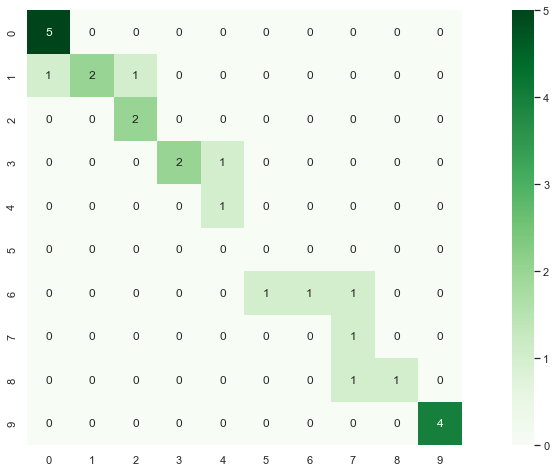

In [75]:
sns.heatmap(cm_dtc, square=True , annot=True,cmap="Greens")

In [76]:
print(classification_report(y_test, y_pred_Decision))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91         5
           2       1.00      0.50      0.67         4
           3       0.67      1.00      0.80         2
           4       1.00      0.67      0.80         3
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         0
           7       1.00      0.33      0.50         3
           8       0.33      1.00      0.50         1
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         4

    accuracy                           0.76        25
   macro avg       0.73      0.70      0.65        25
weighted avg       0.89      0.76      0.77        25



<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> Random Forest </span></strong>

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [78]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [79]:
from sklearn.metrics import f1_score
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test,average = 'micro'))

Testing Set Evaluation F1-Score=> 0.8399999999999999


In [80]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1
           8       0.75      1.00      0.86         3
           9       1.00      0.50      0.67         2
          10       0.75      1.00      0.86         3
          11       0.00      0.00      0.00         1

    accuracy                           0.84        25
   macro avg       0.77      0.78      0.74        25
weighted avg       0.85      0.84      0.82        25



<AxesSubplot:>

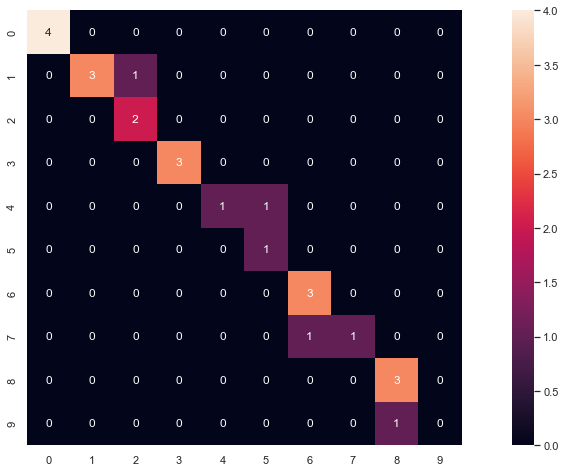

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf = confusion_matrix(y_test,rfc_pred_test)

sns.heatmap(cm_rf, square=True , annot=True)

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> SVM </span></strong>

In [82]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [83]:
y_pred_svm = svclassifier.predict(X_test)

In [84]:
y_pred_svm

array([ 3,  2,  9,  2,  3,  4,  1,  9,  8, 10, 10,  1,  9,  4,  2,  7,  2,
        4,  7,  1,  9,  1,  9,  8,  9], dtype=int64)

In [85]:
accuracy = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  60.0


In [86]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 2 0 0]
 [0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.50      0.33      0.40         3
           9       0.17      0.50      0.25         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1

    accuracy                           0.60        25
   macro avg       0.47      0.48      0.47        25
weighted avg       0.59      0.60      0.59        25



<AxesSubplot:>

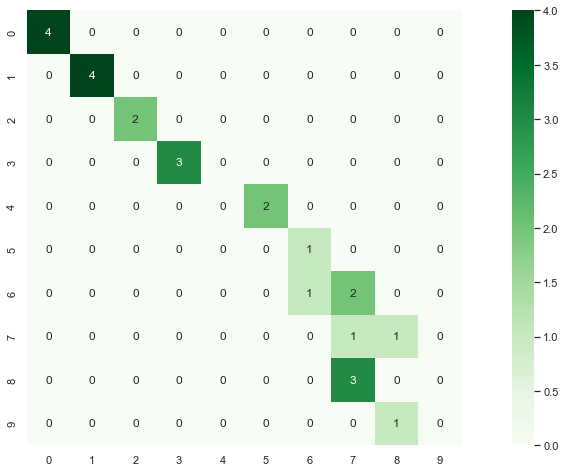

In [87]:
cm_svm =confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm_svm, square=True , annot=True,cmap="Greens")

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> XGBoost </span></strong>

In [88]:
!pip install xgboost==0.90

  Using cached xgboost-0.90-py2.py3-none-win_amd64.whl (18.3 MB)


You should consider upgrading via the 'C:\Users\Salio\anaconda3\envs\cnn1\python.exe -m pip install --upgrade pip' command.


In [89]:
import xgboost as xgb

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 5)
(75,)
(25, 5)
(25,)


In [91]:
from xgboost import XGBClassifier

In [92]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [93]:
y_pred_XGB = model.predict(X_test)

In [94]:
accuracy = accuracy_score(y_test,y_pred_XGB) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  88.0


In [95]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_XGB))
print(classification_report(y_test,y_pred_XGB))

[[4 0 0 0 0 0 0 0 0 0]
 [0 3 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 1 0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       0.75      1.00      0.86         3
          11       0.00      0.00      0.00         1

    accuracy                           0.88        25
   macro avg       0.79      0.82      0.78        25
weighted avg       0.88      0.88      0.86        25



<AxesSubplot:>

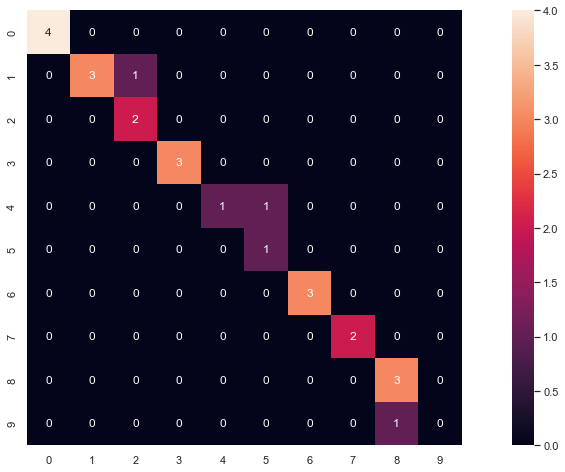

In [96]:
cm_xg =confusion_matrix(y_test,y_pred_XGB)
sns.heatmap(cm_xg, square=True , annot=True)

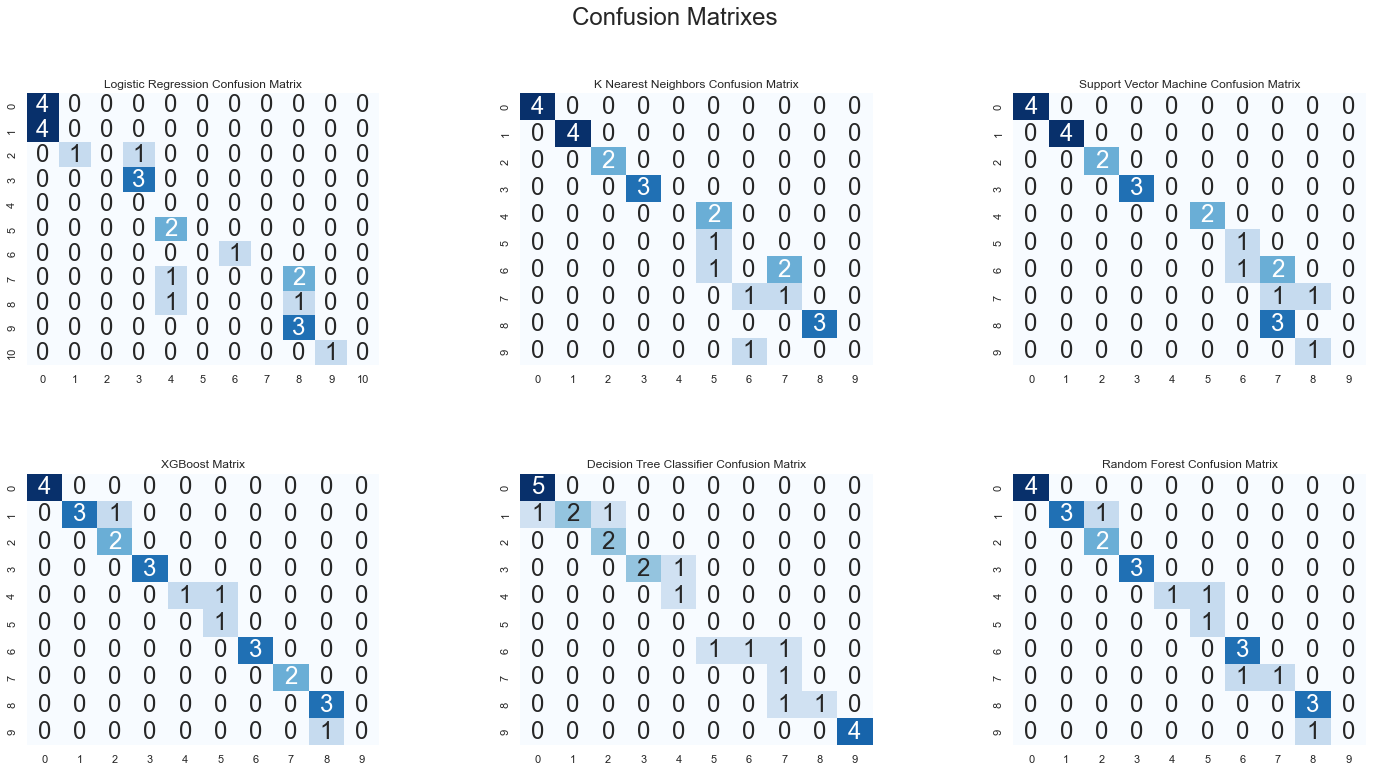

In [97]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("XGBoost Matrix")
sns.heatmap(cm_xg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong> <span style="font-family: courier new, courier; font-size: 18pt;"> Neural network  </span></strong>

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(1) , max_iter=110 , alpha=1e-4, solver='sgd', random_state=1 
                     ,verbose=True , learning_rate_init=0.5 )

In [ ]:
model.fit(X_train, y_train);

In [ ]:
model.score(X_train, y_train)